In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv("IMDB_Movie.csv")
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
movies.isnull().sum(axis=0).sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [4]:
movies.isnull().sum(axis=1).sort_values(ascending=False)

279     15
4       13
4945    11
2241    11
2342    10
        ..
1703     0
1702     0
1701     0
1700     0
5042     0
Length: 5043, dtype: int64

In [5]:
movies=movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
                    'actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration',
                    'facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio',
                    'plot_keywords'],axis=1)

In [6]:
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0


In [7]:
movies.shape

(5043, 13)

In [8]:
movies=movies[movies['gross'].notnull()]
movies=movies[movies['budget'].notnull()]
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

actor_1_name              0.08
language                  0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [9]:
(movies.isnull().sum(axis=1).sort_values(ascending=False)>5).sum()
movies=movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]

In [10]:
movies.shape

(3891, 13)

In [11]:
movies.groupby('language').language.count().sort_values(ascending=False)
movies.language = movies.language.fillna('English')

In [12]:
movies['budget']=movies['budget']/1000000
movies['gross']=movies['gross']/1000000
movies['profit']=movies['gross']-movies['budget']

In [13]:
movies.sort_values(by='profit',ascending=False)
top5 = movies.sort_values(by='profit',ascending=False).head()

In [14]:
top5

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459


In [15]:
movies.drop_duplicates(keep='first',inplace=True)

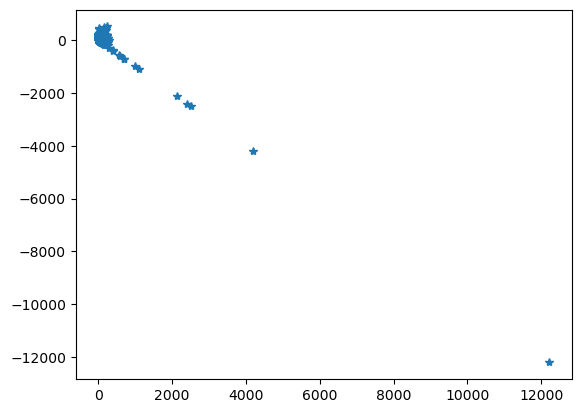

In [16]:
plt.plot(movies['budget'],movies['profit'],'*')
plt.show()

In [17]:
Top_250=movies[movies['num_voted_users']>25000].sort_values(by='imdb_score',ascending=False).head(250)

In [18]:
Top_250[Top_250['language']!='English']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.200000,1966.0,8.9,20000,4.900000
4747,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2.000000,1954.0,8.7,11000,-1.730939
4029,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3.300000,2002.0,8.7,28000,4.263397
2373,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19.000000,2001.0,8.6,28000,-8.950114
4259,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2.000000,2006.0,8.5,39000,9.284657
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,0.180000,1997.0,8.5,0,0.745402
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
2970,Wolfgang Petersen,96.0,11.433134,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426,German,14.000000,1981.0,8.4,11000,-2.566866
4105,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,3.000000,2003.0,8.4,43000,-0.818710
4659,Asghar Farhadi,354.0,7.098492,Drama|Mystery,Shahab Hosseini,A Separation,151812,264,Persian,0.500000,2011.0,8.4,48000,6.598492


In [19]:
topdirector=movies.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10)
topdirector

director_name
Charles Chaplin          8.600000
Tony Kaye                8.600000
Alfred Hitchcock         8.500000
Ron Fricke               8.500000
Damien Chazelle          8.500000
Majid Majidi             8.500000
Sergio Leone             8.433333
Christopher Nolan        8.425000
S.S. Rajamouli           8.400000
Marius A. Markevicius    8.400000
Name: imdb_score, dtype: float64

In [20]:
TempGenre=movies.genres.str.split('|',expand=True).iloc[:,0:2]
TempGenre.columns=['genre1','genre2']
TempGenre.genre2.fillna(TempGenre.genre1,inplace=True)

In [21]:
TempGenre

,genre1,genre2
0,Action,Adventure
1,Action,Adventure
2,Action,Adventure
3,Action,Thriller
5,Action,Adventure
...,...,...
5033,Drama,Sci-Fi
5034,Thriller,Thriller
5035,Action,Crime
5037,Comedy,Drama


In [22]:
Meryl_Streep = movies[movies['actor_1_name']=='Meryl Streep']
Leo_Caprio = movies[movies['actor_1_name']=='Leonardo DiCaprio']
Brad_Pitt = movies[movies['actor_1_name']=='Brad Pitt']

In [23]:
combined=Meryl_Streep.append([Leo_Caprio,Brad_Pitt])

In [24]:
combined.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()

,num_critic_for_reviews
actor_1_name,
Brad Pitt,245.000000
Leonardo DiCaprio,330.190476
Meryl Streep,181.454545


In [25]:
movies['decade']=movies['title_year'].apply(lambda x: (x//10)*10).astype(np.int64)
movies['decade']=movies['decade'].astype(str)+'s'
movies=movies.sort_values(['decade'])

In [26]:
decade=movies.groupby('decade')
decade['num_voted_users'].sum()
decade=pd.DataFrame(decade['num_voted_users'].sum())
decade

,num_voted_users
decade,
1920s,116392
1930s,804839
1940s,230838
1950s,678336
1960s,2983442
1970s,8524102
1980s,19987476
1990s,69735679
2000s,170908676


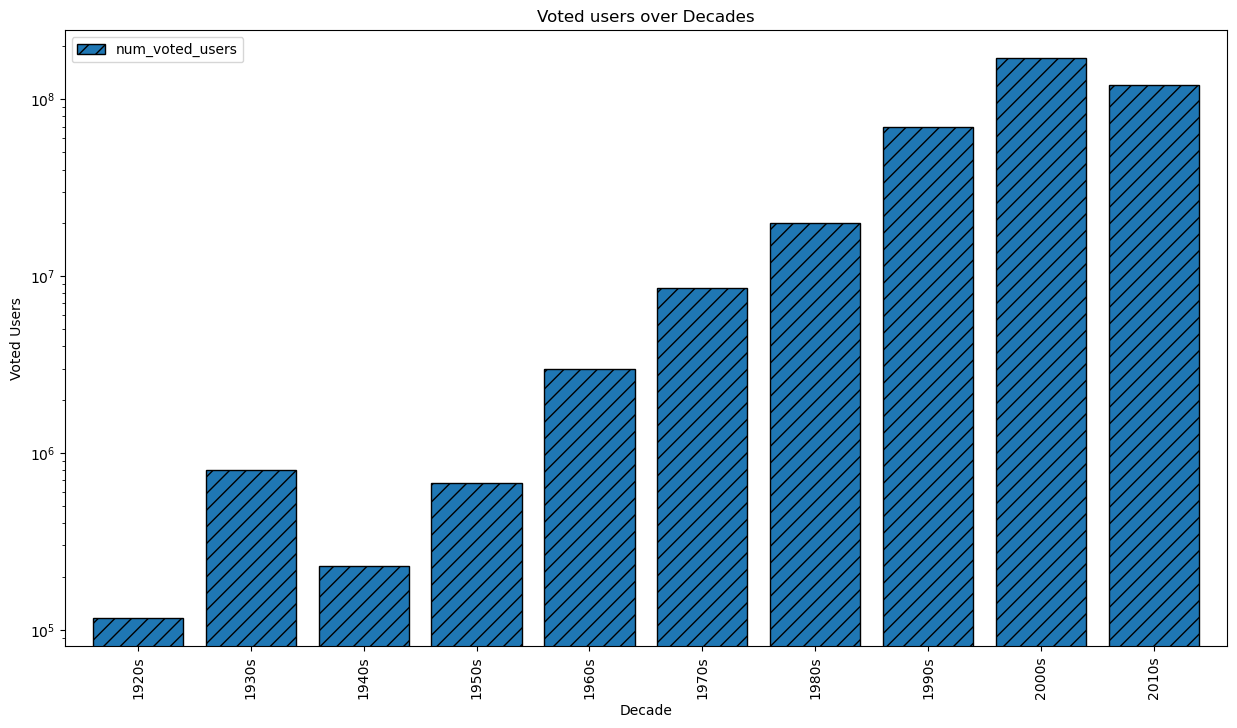

In [27]:
decade.plot.bar(figsize=(15,8),width=0.8,hatch="//",edgecolor='k')
plt.xlabel("Decade")
plt.ylabel("Voted Users")
plt.title("Voted users over Decades")
plt.yscale('log')
plt.show()